# Ensemble

In [8]:
from sklearn.datasets import load_wine
data,target = load_wine(return_X_y=True)

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
random_state_temp = 1
dtc = DecisionTreeClassifier(min_samples_leaf=3, random_state=random_state_temp)
btc = BaggingClassifier(DecisionTreeClassifier(min_samples_leaf=3, random_state=random_state_temp),n_estimators = 50, random_state=random_state_temp)
abc = AdaBoostClassifier(DecisionTreeClassifier(min_samples_leaf=3,max_depth = 1, random_state=random_state_temp), n_estimators = 50,algorithm="SAMME", random_state=random_state_temp)
gbc = GradientBoostingClassifier(init=DecisionTreeClassifier(min_samples_leaf=3, max_depth = 1, random_state=random_state_temp), n_estimators = 50, learning_rate=1.0, subsample=0.5, random_state=random_state_temp)

In [10]:
from sklearn.model_selection import cross_val_score,StratifiedKFold
dtc_val = cross_val_score(dtc,data,target, cv = StratifiedKFold(n_splits = 5,shuffle = True ,random_state = random_state_temp))
btc_val = cross_val_score(btc,data,target, cv = StratifiedKFold(n_splits = 5,shuffle = True ,random_state = random_state_temp))
abc_val = cross_val_score(abc,data,target, cv = StratifiedKFold(n_splits = 5,shuffle = True ,random_state = random_state_temp))
gbc_val = cross_val_score(gbc,data,target, cv = StratifiedKFold(n_splits = 5,shuffle = True ,random_state = random_state_temp))

In [11]:
print(f"DecisionTreeClassifier {dtc_val},({dtc_val.mean()})")
print(f"BaggingClassifier {btc_val},({btc_val.mean()})")
print(f"AdaBoostClassifier {abc_val},({abc_val.mean()})")
print(f"GradientBoostingClassifier {gbc_val},({gbc_val.mean()})")

DecisionTreeClassifier [0.86111111 0.88888889 0.88888889 0.94285714 0.94285714],(0.9049206349206349)
BaggingClassifier [0.94444444 0.97222222 0.91666667 0.97142857 1.        ],(0.9609523809523809)
AdaBoostClassifier [1.         0.91666667 0.97222222 0.94285714 1.        ],(0.9663492063492063)
GradientBoostingClassifier [0.91666667 0.94444444 0.94444444 0.88571429 0.97142857],(0.9325396825396824)


Determine an approximated number of iterations after which the Gradient Boosting model yields almost no further improvement

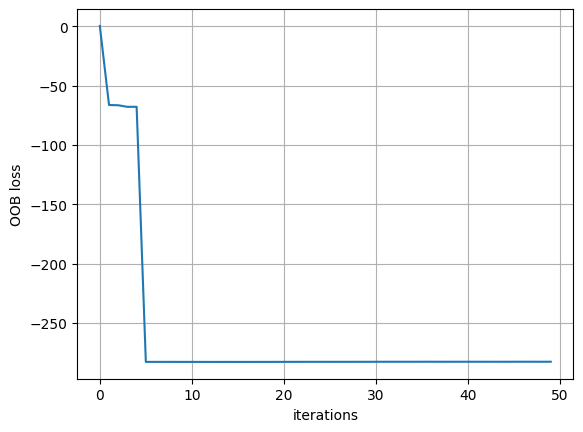

In [12]:
import numpy as np
import matplotlib.pyplot as plt
gbc = GradientBoostingClassifier(init=DecisionTreeClassifier(min_samples_leaf=3, max_depth = 1, random_state=random_state_temp), n_estimators = 50, learning_rate=1.0, subsample=0.5, random_state=random_state_temp)
gbc.fit(data,target)
oob_cumulated = np.cumsum(gbc.oob_improvement_)
plt.plot(oob_cumulated)
plt.xlabel("iterations")
plt.ylabel("OOB loss")
plt.grid()
plt.show()